# Algorithme Non Supervisé

### Ajout des bibliothèques

In [8]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
# import umap



### Importation CSV file

We don't use the id et time_active column.

In [9]:
# Importation CSV file
df = pd.read_csv('data/users.csv')

# Suppression de 'user_id' et 'time_active'
X = df.drop(columns=['user_id', 'time_active'])

# Vérifie si c'est bon
print("Colonnes conservées :", X.columns.tolist())

Colonnes conservées : ['n_tweets', 'n_replies', 'n_quotes', 'n_retweets', 'max_followers', 'n_mentions', 'n_hashtags', 'n_urls', 'n_out_urls', 'f_tweets', 'f_friends']


### Standardisation des données

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### KMeans clustering

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)


### Evaluation du nombre de clusers 



In [12]:

# Sous-échantillonnage
from sklearn.utils import resample
X_sample = resample(X_scaled, n_samples=10000) if X_scaled.shape[0] > 2000 else X_scaled

# Test des k
for k in range(2, 13):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(X_sample)
    score = silhouette_score(X_sample, km.labels_)
    print(f"k={k}, silhouette={score:.3f}")


k=2, silhouette=0.988
k=3, silhouette=0.938
k=4, silhouette=0.922
k=5, silhouette=0.921
k=6, silhouette=0.808
k=7, silhouette=0.806
k=8, silhouette=0.727
k=9, silhouette=0.743
k=10, silhouette=0.626
k=11, silhouette=0.632
k=12, silhouette=0.617


Problem : a lot of k are good enough for a non supervised algorithm.

##  KMeans tests

## def of a function

In [19]:
def algoKmeans(k):
    # Liste des features utilisées pour la normalisation (à adapter selon ton code)
    features = ['n_tweets', 'n_replies', 'n_quotes', 'n_retweets', 'max_followers', 
                'n_mentions', 'n_hashtags', 'n_urls', 'n_out_urls', 'f_tweets', 'f_friends']
    
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    clusters = kmeans.labels_
    centers = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    
    print("🔹 Labels (attribution des clusters) :")
    print(clusters)

    print("\n🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :")
    print(centers)

    print(f"\n🔹 Inertie (somme des distances intra-cluster) : {inertia:.2f}")

    # Réduction de dimension à 2 composantes principales
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)
    print("Somme :", sum(pca.explained_variance_ratio_))
    
    # DataFrame pour visualisation PCA + clusters
    df_visu = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_visu['cluster'] = clusters
    df_visu['user_id'] = df['user_id'].values  # si user_id est dans df
    
    # Ajout des clusters dans df original (non normalisé)
    df['cluster'] = clusters
    
    # Moyennes des variables originales par cluster
    features = df.columns.drop(['user_id', 'cluster'])  # adapte selon colonnes à exclure
    moyennes_orig = df.groupby('cluster')[features].mean()
    clust_median = df.groupby('cluster')[features].median()
    clusts_len = df.groupby('cluster').size()
    
    print("\n🔹 Nombre d'individus par cluster :")
    print(clusts_len)

    print("\n🔹 Moyennes des variables originales par cluster :")
    print(moyennes_orig)

    print("\n🔹 Medianes des variables originales par cluster :")
    print(clust_median)

    # Visualisation graphique PCA + clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_visu, x='PC1', y='PC2', hue='cluster', palette='Set1', s=60)

    plt.title(f"Représentation des clusters KMeans en 2D (ACP) pour k={k}")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    
    #Visualisation avec UMAP (pas fonctionnel)
    
    # reducer = umap.UMAP(n_components=2, random_state=42)
    #X_umap = reducer.fit_transform(X_scaled)

    # sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=clusters, palette='Set2')
    # plt.title("UMAP des utilisateurs avec KMeans")
    # plt.show()

### Kmeans = 2

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-7.33102888e-04 -6.99179842e-05 -1.11438189e-03 -5.85142807e-04
  -4.10194638e-06 -5.67441293e-04 -7.71957800e-04 -7.19559722e-04
  -1.92699599e-04  4.01531733e-12 -6.86990721e-05]
 [ 4.50476085e+02  4.29631097e+01  6.84763899e+02  3.59557772e+02
   2.52055854e+00  3.48680569e+02  4.74351600e+02  4.42154099e+02
   1.18409793e+02 -2.46792530e-06  4.22141142e+01]]

🔹 Inertie (somme des distances intra-cluster) : 16195257.32
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.5259303906964486

🔹 Nombre d'individus par cluster :
cluster
0    1843436
1          3
dtype: int64

🔹 Moyennes des variables originales par cluster :
            n_tweets  n_replies     n_quotes   n_retweets  max_followers  \
cluster                                                                    
0           2.472259   0.054903     0.354993     1.621647    3602.476

C:\Users\lucas\AppData\Local\Temp\ipykernel_5828\3149796131.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\lucas\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


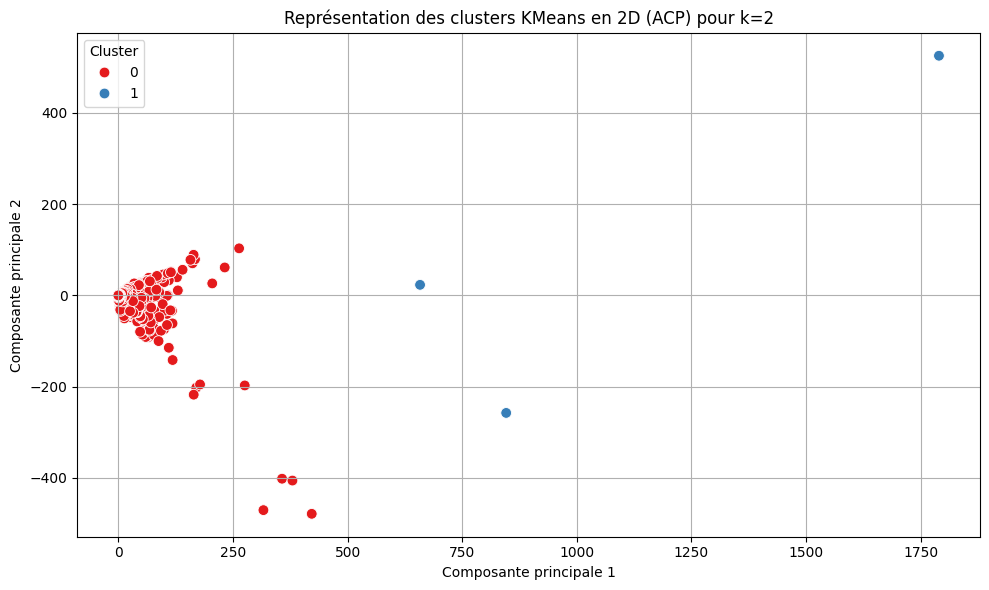

In [20]:
algoKmeans(2)

En formant 2 clusters, on ne sépare que 3 individus de la totalité des autres. Cela montre bien qu'ils sont particulièrement atypiques. Au vu des moyennes et médianes des variables par cluster, on voit que les 3 individus sont extrêmement actifs. Ils ont un nombre de tweets de toutes sortes ainsi que de demandes d'amis considérable. Etant si éloignés du reste des individus, on peut donc supposer qu'il ne s'agisse pas là d'utilisateurs humains, mais de robots. Ils pourraient donc constituer une première piste d'exploration, mais leur nombre étant encore très réduit, on peut augmenter le nombre de clusters afin d'affiner la classification.

### Kmeans = 3

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-1.05016170e-03 -6.80253418e-04 -1.14416694e-03 -5.84536879e-04
  -4.03052209e-06 -6.99134610e-04 -1.03410351e-03 -1.53531486e-03
  -1.16397189e-03  1.13297145e-08 -6.91837776e-05]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]
 [ 1.66629361e+02  1.79148750e+02  1.90185511e+02  1.33945229e+01
   1.06515361e+00  5.24226227e+01  2.04847301e+02  3.41491878e+02
   2.59246872e+02 -3.60304431e-03  1.82207874e+01]]

🔹 Inertie (somme des distances intra-cluster) : 14461266.97
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.5259303906964657

🔹 Nombre d'individus par cluster :
cluster
0    1843431
1          1
2          7
dtype: int64

🔹 Moyennes des variables originales par cluster :
            n_tweets   n_

C:\Users\lucas\AppData\Local\Temp\ipykernel_5828\3149796131.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\lucas\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


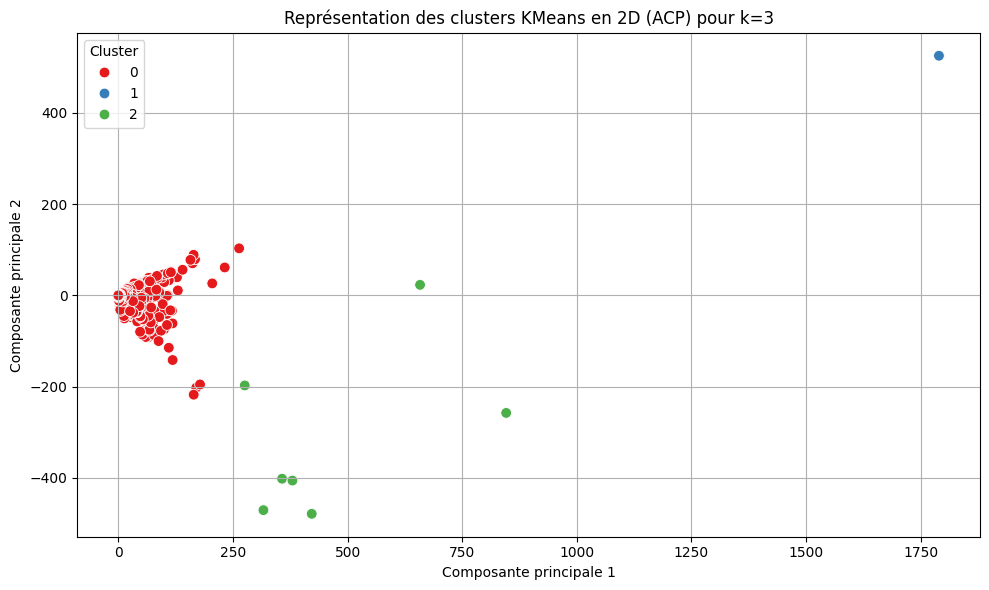

In [21]:
algoKmeans(3)

Avec 3 clusters, on retrouve plus ou moins la même séparation que précédemment. Un cluster contient l'ultra-majorité des utilisateurs et les deux autres contiennent les quelques individus particulièrement actifs. Encore une fois, le faible nombre d'individus appartenant à ces clusters limite l'interprétation qui peut en être faite.

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.09160717e-02 -8.57817004e-03 -5.94496991e-03 -1.54064426e-02
  -1.10406770e-03 -1.68736623e-02 -1.70145570e-02 -1.42728024e-02
  -1.19644758e-02 -8.53998612e-07 -1.25557167e-04]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.30973757e+02  4.33576154e-03 -9.99121516e-03]
 [ 1.97954980e+02  2.59106079e+01  2.55191695e+02  1.88419250e+01
   1.50286560e+00  2.48715370e+01  2.49840467e+02  4.04810208e+02
   3.33544023e+02 -3.37945674e-03  2.54986085e+01]
 [ 1.17695699e+01  5.01666044e+00  2.84740364e+00  8.73907713e+00
   6.48619289e-01  9.61441767e+00  9.48110341e+00  7.62657950e+00
   6.41450640e+00  5.07589046e-04  3.31885005e-02]]

🔹 Inertie (somme des distances intra-cluster) : 12858100.69
Variance expliquée par PC1 et PC2 : [0.41317466 0.11275574]
Somme : 0.525930

C:\Users\lucas\AppData\Local\Temp\ipykernel_5828\3149796131.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\lucas\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


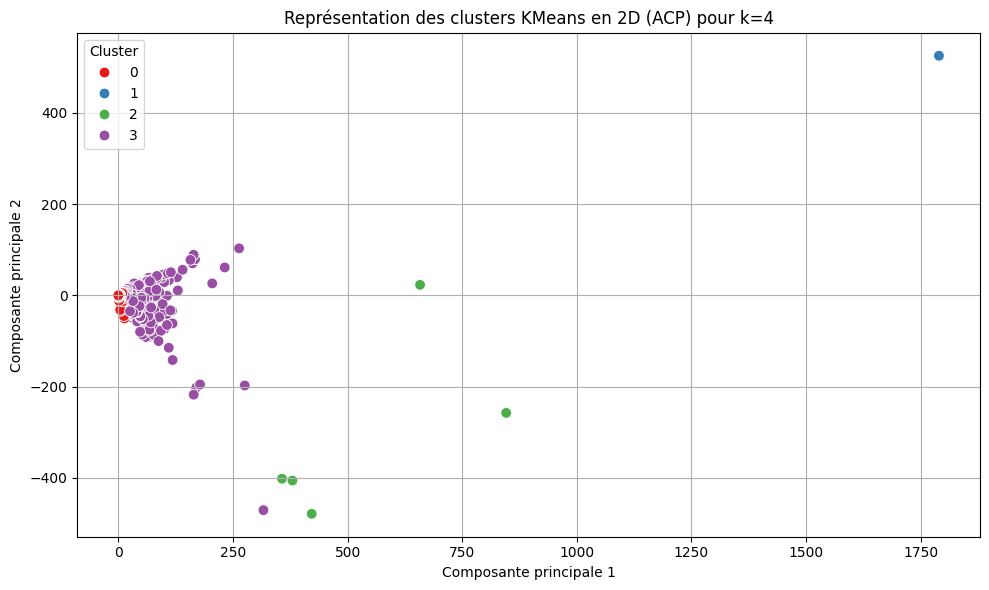

In [22]:
algoKmeans(4)

AVec 4 clusters, on voit apparaître un nouveau cluster (ici le 3) qui semble regrouper des utilisateurs plus actifs que la moyenne (grand nombre d'actions en général) et qui ont un nombre important de followers. On peut considérer que ce sont ces individus qui ont le plus d'influence sur Twitter, avec un grand nombre de tweets combiné à une grande visibilité. Cette classe contient donc potentiellement certains individus menaçants pour la communauté.

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.24693139e-02 -8.84049116e-03 -6.28756287e-03 -1.67585972e-02
  -5.19665156e-03 -1.82577609e-02 -1.82269253e-02 -1.48854600e-02
  -1.25106527e-02 -1.38150844e-03 -1.36970781e-04]
 [-5.16258729e-02 -4.10130069e-02  1.72963539e-02  2.39846273e-02
  -2.72379967e-02  1.29467352e-01  4.43961273e-02  2.66810414e-02
   1.18463278e-01  5.08646983e+02 -9.99121516e-03]
 [ 1.66629361e+02  1.79148750e+02  1.90185511e+02  1.33945229e+01
   1.06515361e+00  5.24226227e+01  2.04847301e+02  3.41491878e+02
   2.59246872e+02 -3.60304431e-03  1.82207874e+01]
 [ 1.08280047e+01  4.12498641e+00  2.59920229e+00  8.17658035e+00
   2.62529216e+00  8.87632246e+00  8.69116236e+00  6.74792398e+00
   5.73526846e+00 -4.21204878e-04  3.42158556e-02]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.3

C:\Users\lucas\AppData\Local\Temp\ipykernel_5828\3149796131.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\lucas\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


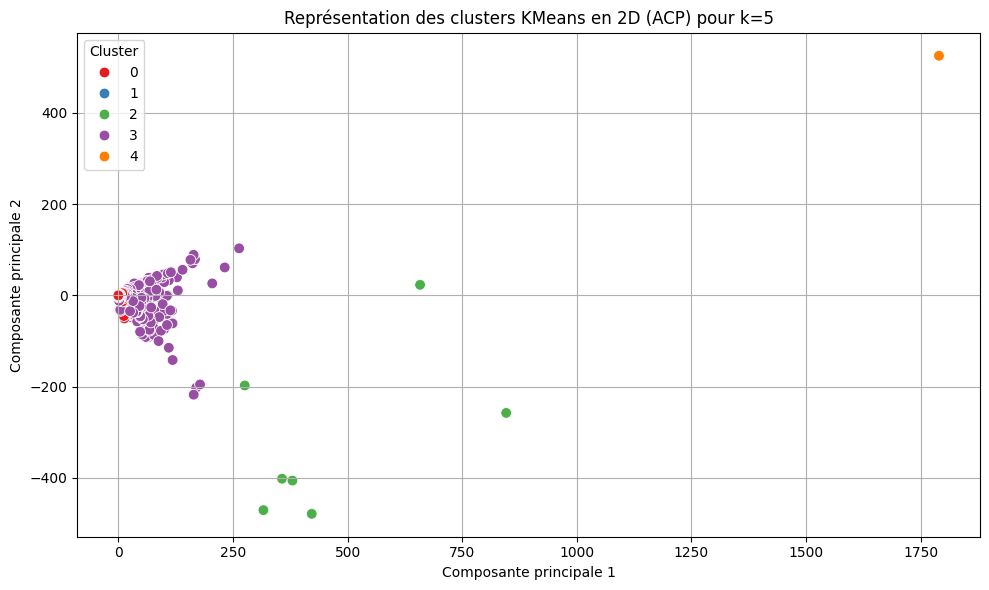

In [23]:
algoKmeans(5)

🔹 Labels (attribution des clusters) :
[0 0 0 ... 0 0 0]

🔹 Centres des clusters (coordonnées dans l’espace PCA ou des features) :
[[-2.14725602e-02 -8.69199644e-03 -6.05944188e-03 -1.58529417e-02
  -4.85646736e-03 -1.73414650e-02 -1.74344132e-02 -1.45259305e-02
  -1.21794894e-02 -2.52768524e-06 -1.69088924e-03]
 [ 1.13541105e+01  4.77139672e+00  2.73582175e+00  8.44902093e+00
   2.68506100e+00  9.28241821e+00  9.13069296e+00  7.29778697e+00
   6.13929673e+00  1.08999814e-04  3.16049999e-02]
 [ 1.35947251e+02  2.07565737e-01 -1.46329422e-01 -2.23982376e-01
  -2.44778439e-02  5.46768143e-02  9.95049635e+01  3.79130872e+02
   5.47821499e+02 -4.18470612e-03  2.80236255e-01]
 [ 2.25640796e-03 -4.10130069e-02 -7.81520157e-02  5.61670113e-03
   1.79872709e-01 -3.03124331e-02 -4.19760302e-03  3.28658527e-02
  -5.87964561e-02  7.16889301e-01  4.79806499e+02]
 [ 7.69495109e+02 -4.10130069e-02  7.77894237e+02  9.83791744e+02
  -2.60859183e-02  9.21848053e+02  4.72367356e+02  4.39803871e+02
   3.3

C:\Users\lucas\AppData\Local\Temp\ipykernel_5828\3149796131.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\lucas\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


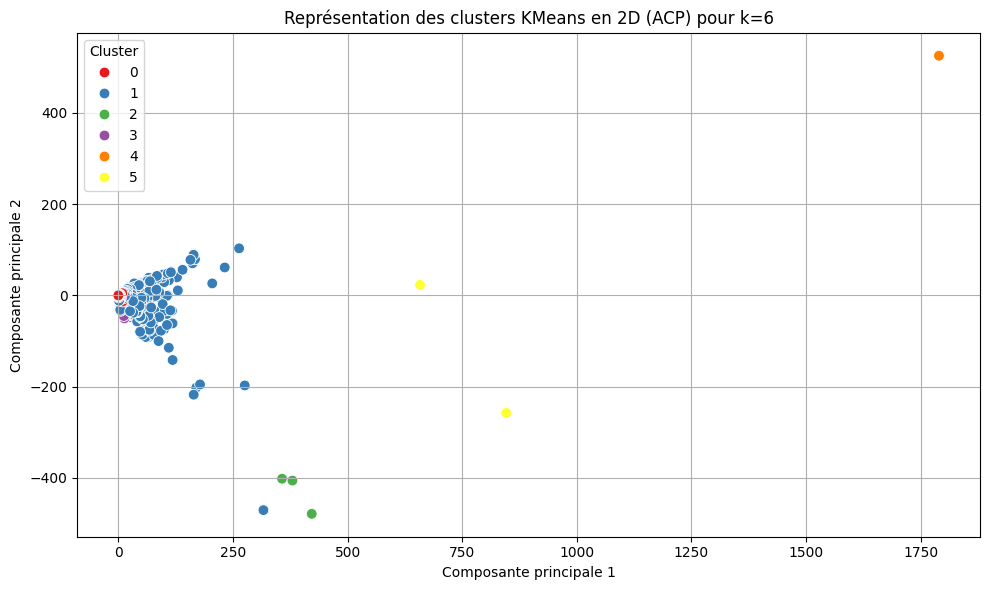

In [24]:
algoKmeans(6)